In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot prior functions in the interval [-4,4]

In [2]:
f = lambda x: np.sin(0.5*x).flatten()

In [4]:
def kernel(x,y):
    #Kernel function (RBF)
    sq_dist = np.sum(x**2,1).reshape(-1,1) + np.sum(y**2,1) - 2*np.dot(x,y.T)
    return np.exp(-.5*sq_dist)

In [5]:
n = 100 # number of test points
N = 5 # number of training points

s = 0.00001 #noise

#given training points
D = [(-3.8,-0.9463),(-3.2,-0.9996),(-3,-0.9975),(1,0.4794),(3,0.9975)]

X = [d[0] for d in D]
y = [d[1] for d in D]

Xtrain = np.array(X).reshape(5,1)
ytrain = f(Xtrain) + s*np.random.randn(N)

print(ytrain)

Xtest =  np.linspace(-4,4,n).reshape(-1,1)
ytest = f(Xtest)

print(Xtest.shape)
print(ytest.shape)
print(Xtrain.shape)
print(ytrain.shape)
print(n,N)

[-0.94630041 -0.99957474 -0.99748895  0.47943838  0.99748822]
(100, 1)
(100,)
(5, 1)
(5,)
100 5


(100, 100)


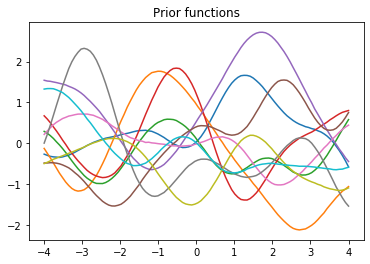

In [6]:
#drawing samples from prior at the test points - Check this expression why is that what it is
Kss = kernel(Xtest,Xtest)
print(Kss.shape)

L = np.linalg.cholesky(Kss + s * np.eye(n))
f_prior = np.dot(L,np.random.normal(size=(n,10)))

plt.title('Prior functions')
plt.plot(Xtest,f_prior)

# NonLinear Regression 

In [7]:
#covariance between training points
K = kernel(Xtrain,Xtrain)
L = np.linalg.cholesky(K + s * np.eye(N))

#Compute the mean and variance of the test points

# Using linalg.solve to solve the system of linear equations for K_star
Lk = np.linalg.solve(L, kernel(Xtrain,Xtest))
#mu = np.dot(Lk.T, np.linalg.solve(L, ytrain))
mu = np.dot(np.dot((kernel(Xtrain,Xtest)).T, np.linalg.inv(K)), ytrain)


#taking only the digonal values from covariance matrix for getting the standard deviation
s2 = np.diag(Kss) - np.sum(Lk**2,axis = 0)
s = np.sqrt(s2)

(100, 1) (100,)
mu (100,)


Text(0.5, 1.0, 'Mean predictions plus 3 st.deviations')

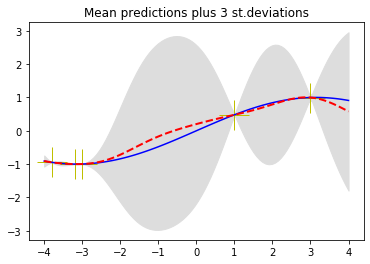

In [8]:
#Plots for regression

#Plot for mean points on the top of test distribution

#Plotting the training distribution
plt.plot(Xtrain,ytrain,'y+',ms=30)

#Plotting the test distribution (Xtest, ytest)
print(Xtest.shape,ytest.shape)
plt.plot(Xtest,ytest,'b-')

# #Plotting the confidence interval of the distribution
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

#Plotting the mean points on the test distribution
print("mu",mu.shape)
plt.plot(Xtest,mu,'r--',lw=2)
plt.title('Mean predictions plus 3 st.deviations')

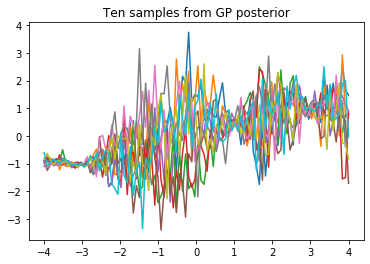

In [9]:
# plotting the posterior distribution functions

#Using the GP regression algorithm that uses variance to plot the posterior functions derived using gaussian conditional approach
L = np.linalg.cholesky(Kss + s*np.eye(n) - np.dot(Lk.T,Lk))
f_post = mu.reshape(-1,1) + np.dot(L,np.random.normal(size = (n,10)))
plt.title('Ten samples from GP posterior')
plt.plot(Xtest,f_post)

In [ ]:
#Plotting everything

#Plot mean points

# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(Xtrain, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#













In [ ]:
%run ref_gp.py